# Rachel Tekchandani DATA 4319

## Neural Network from Scratch in Julia using the MNIST Data Set

In [1]:
using MLDatasets    # give us access to MNIST data set
using Images        # allow us to view images
using TestImages
using Plots         # plot performance and accuracy

### Data is 70,000 images of hard written digits.  
### We will use 60,000 for training and the remaining 10,000 will be used for testing.

Dataset: THE MNIST DATABASE of handwritten digits
Authors: Yann LeCun, Corinna Cortes, Christopher J.C. Burges
Website: http://yann.lecun.com/exdb/mnist/

[LeCun et al., 1998a]


    Y. LeCun, L. Bottou, Y. Bengio, and P. Haffner.
    "Gradient-based learning applied to document recognition."
    Proceedings of the IEEE, 86(11):2278-2324, November 1998
    
![mnist](mnist.png)

## MNIST = Modified National Institute of Standards and Technology database

In [2]:
# create the training data set
train_x, train_y = MNIST.traindata()

(Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [5, 0, 4, 1, 9, 2, 1, 3, 1, 

In [3]:
# create the testing data set
test_x, test_y = MNIST.testdata()

(Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

...

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8]

Normed{UInt8,8}[0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; … ; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8; 0.0N0f8 0.0N0f8 … 0.0N0f8 0.0N0f8], [7, 2, 1, 0, 4, 1, 4, 9, 5, 

## Tensors are multi dimensionar array.  each slice is a matrix, each matrix is a feature of an image

## check size of train_x

![tensor](tensor.png)

In [4]:
size(train_x)

(28, 28, 60000)

28 pixels wide, 28 pixels tall and 60,000 entries

In [5]:
# attempt to visualize the data
train_x[:, :,1]

28×28 Array{N0f8,2} with eltype Normed{UInt8,8}:
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.0    0.0    0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.0    0.216  0.533  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0    …  0.0    0.675  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.071  0.886  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.0       0.671  0.992  0.992  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.118     0.859  0.992  0.831  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.141     0.992  0.992  0.529  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.369  …  0.992  0.992  0.518  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0    0.604     0.992  0.957  0.063  0.0  0.0  0.0
 0.0  0.0  0.0 

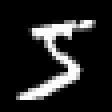

In [6]:
# best to use the function colorview and pass in 
# the transpose of the data used in the input layer
colorview(Gray, train_x[:,:,1]')

In [7]:
println("the first image in our data is labeled ", train_y[1])

the first image in our data is labeled 5


In [8]:
# need a column vector by stacking all the columns of the original matrix
reshape(train_x[:,:,1], 784)

784-element Array{N0f8,1} with eltype Normed{UInt8,8}:
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 ⋮
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8
 0.0N0f8

In [9]:
# Reshape all of the training data to be a 784 element column
X = []
Y = []

for i = 1:60000
    push!(X, reshape(train_x[:,:, i], 784))  # reshape the X to be a single column of size 784
    y = zeros(10)
    y[train_y[i] + 1] = 1.0                  # create a output layer vector where the correct answer is 1.0
    push!(Y, y)
end

train_data = [x for x in zip(X,Y)];

In [10]:
# Reshape all of the testing data to be a 784 element column
X = []
Y = []

for i = 1:10000
    push!(X, reshape(test_x[:,:, i], 784))  # same as above, just with the training data
    y = zeros(10)                           # replaced with the test data
    y[test_y[i] + 1] = 1.0
    push!(Y, y)
end

test_data = [x for x in zip(X,Y)];

## Activation Function

## Sigmoid function

# $$ \sigma (s) = \frac{1}{1 + e^{-s}} $$

## Pre-activation phase for each layer $l$ for $l = 2, \ldots , L$ 

# $$ z^l = W^la^{l-1} + b^l $$

## Post-activation phase:

# $$ a^l = \sigma (x^l) $$

## Mean Square Error for cost with output layer of n=10:


# $$ C = C(W, b) = \frac{1}{2} \sum_{k=1}^{n} (a_k^L - y_k^{(i)})^2 $$

In [11]:
"""
    σ(x)

Sigmoid function, used for activation in the neural network
# Arguments
- `x`: the input argument passed to the function

returns
- a value between 0 and 1
"""
σ(x) = 1.0/(1.0 + exp(-x))

σ

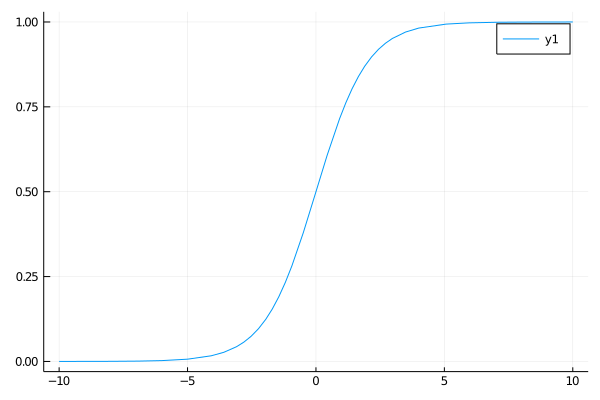

In [12]:
plot(σ,-10,10)

In [13]:
"""
    dσ(x)

Derivative of the Sigmoid function, 
# Arguments
- `x`: the input argument passed to the function

returns
- a value between 0 and .25 with maximum found at 0
"""
dσ(x) = σ(x) * (1-σ(x))

dσ

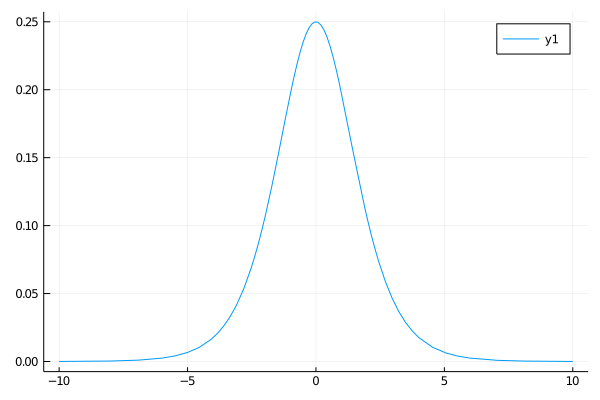

In [14]:
plot(dσ,-10,10)

In [15]:
# define a neual network type
# since the data type will need change, it will be mutable
mutable struct neural_network
    W     # Weight Matrix
    b     # Bias matrix
end

## Create a Neural Network with three types of layers
## - Input layer.  The image data.
## - Output layer.  Used for the classification of digits.
## - Hidden layers.  Multiple layers of neurons used to assist with the classification.

![layers](layers.png)

In [16]:
# how to form the neural network
"""
    create_network(input_layer_size, hidden_layer_sizes, output_layer_size)

Creates a neural network based on values in the arguemnts to the function 
# Arguments
- `input_layer_size`   : the size of the input layer
- `hidden_layer_sizes` : an array of sizes of the hidden layers
- `output_layer_size`  : the size of the output layer

returns
- a neural network initiliazed with random values with the sizes specified
"""
function create_network(input_layer_size, hidden_layer_sizes, output_layer_size)
    
    W = [[0.0], randn(hidden_layer_sizes[1], input_layer_size)]
    
    b = [[0.0], randn(hidden_layer_sizes[1])]
    
    # construct the hidden layers
    for i = 2:length(hidden_layer_sizes)
        push!(W, randn(hidden_layer_sizes[i], hidden_layer_sizes[i-1]))
        push!(b, rand(hidden_layer_sizes[i]))
    end
    
    # final, output layer
    push!(W, randn(output_layer_size, hidden_layer_sizes[end]))
    push!(b, randn(output_layer_size))
    
    # retrun the neural network type and use the W and b as input and this is returned
    # as the output of hte create_network function
    return neural_network(W, b)
end

create_network

In [17]:
# 784 is the input layer, which is the size of the image data when column stacked
# 100,100,100 are the hidden layers
# 10 is the size of the ouput layer, the ten digit possiblities

NN = create_network(784, [100, 100, 100], 10)

neural_network(Array{Float64,N} where N[[0.0], [1.13135962818687 0.758082059409886 … -0.4281697116904303 1.3680202757181805; -0.02133405282399775 1.6922823236941837 … 0.49776094863023707 -0.4194499806917455; … ; 0.16532457027123915 -1.172476102931094 … -0.6231185821720737 0.22132918748986544; -0.5157870094392545 0.0620252039516046 … -1.6969865116989153 0.892597804616782], [0.1980193142108844 0.23958735241679213 … -0.29600158467604837 -0.40354617616903876; -0.748114132936791 -0.8720018058712032 … 0.6275784661787498 -0.08772262498960086; … ; 0.4354438492600971 -0.814682696230068 … -0.6682231007058432 0.8322052291576062; 0.5712280881528602 -1.3137937504694748 … 0.1739819935643854 -0.32029162732821786], [0.38576057203719927 0.14714908889160544 … -0.8278861688612018 0.21458157019943888; -0.5604510684555573 0.9808574847102611 … -0.6400262751752988 -0.3397471619686875; … ; 0.24120706360379265 -0.30205842787752807 … 0.5041100321516674 0.17465696910323045; 0.3115184057272767 0.845899567363968 …

In [18]:
# initial (random) weights
NN.W

5-element Array{Array{Float64,N} where N,1}:
 [0.0]
 [1.13135962818687 0.758082059409886 … -0.4281697116904303 1.3680202757181805; -0.02133405282399775 1.6922823236941837 … 0.49776094863023707 -0.4194499806917455; … ; 0.16532457027123915 -1.172476102931094 … -0.6231185821720737 0.22132918748986544; -0.5157870094392545 0.0620252039516046 … -1.6969865116989153 0.892597804616782]
 [0.1980193142108844 0.23958735241679213 … -0.29600158467604837 -0.40354617616903876; -0.748114132936791 -0.8720018058712032 … 0.6275784661787498 -0.08772262498960086; … ; 0.4354438492600971 -0.814682696230068 … -0.6682231007058432 0.8322052291576062; 0.5712280881528602 -1.3137937504694748 … 0.1739819935643854 -0.32029162732821786]
 [0.38576057203719927 0.14714908889160544 … -0.8278861688612018 0.21458157019943888; -0.5604510684555573 0.9808574847102611 … -0.6400262751752988 -0.3397471619686875; … ; 0.24120706360379265 -0.30205842787752807 … 0.5041100321516674 0.17465696910323045; 0.3115184057272767 0.84589956736

In [19]:
# initial (random) biases
NN.b

5-element Array{Array{Float64,1},1}:
 [0.0]
 [-0.6741975366299958, 1.8289533449025248, -0.819210385064617, -0.13749626566083736, 0.18685655013924352, -1.229721779028793, -0.1928337091989821, -0.33888667460320493, 1.362280654244017, -0.6378266134329089  …  0.8461488409839888, 0.16987247095619376, 2.237379465342072, -0.9489769885798833, 0.595435859781817, 0.506863926793024, -0.3474546413959295, -0.8373715504323587, -1.7828625042888184, 0.10255571271064429]
 [0.8286228991259463, 0.7666307175635596, 0.8736001316950366, 0.6629509559516744, 0.7584326733896354, 0.1987670776566146, 0.1375005202996784, 0.917344611042157, 0.9303945622727461, 0.6006253616409682  …  0.5433715705065087, 0.6241219167813006, 0.49291391544295315, 0.07625132587507721, 0.29487487954376523, 0.15670786976078754, 0.0861917426050125, 0.9751981512411254, 0.9269092653495947, 0.7221895242632819]
 [0.5441958962567373, 0.13355090251205404, 0.13829888611789154, 0.06410452236469344, 0.17782864255792852, 0.8073333026394474, 0.10793

In [20]:
# Inspect the size of the layers by interating through the 3 dimensional matrix of weights
for w in NN.W
        println(size(w))
        println("")
end

(1,)

(100, 784)

(100, 100)

(100, 100)

(10, 100)



In [21]:
"""
    forward_pass(network, training_instance)

Compute the pre-activationa nd post-activation at each layer
# Arguments
- `network`   : a neural netowrk
- `training_instance` : a single instance for training
                        a tuple with one entry is the feature that we need to pass in

returns
- a neural network initiliazed with random values with the sizes specified
"""

function forward_pass(network, training_instance)
    Z = [[0.0]]                   # preactivation
    A = [training_instance[1]]    # post activation, the training instance
    
    for i = 2:length(network.W)   # how many layers there are
        # push into our preactivation 
        push!(Z, network.W[i]*A[i-1] + network.b[i])
        # push into our post activation, brodcast, or apply signoid to each
        push!(A, σ.(Z[i]))
    end
    # return Z and A, which contain the pre and post activation at each layer
    return Z, A
end

forward_pass (generic function with 1 method)

In [22]:
"""
    predict(network, training_instance)

Compute the pre-activationa nd post-activation at each layer
# Arguments
- `network`           : a neural netowrk
- `training_instance` : a single instance for training
                        a tuple with one entry is the feature that we need to pass in

returns
- the prediction of the network, which digit it recognizes based on the instance
"""

function predict(network, training_instance)
    Z, A = forward_pass(network, training_instance)
    # return the index of the highest valued element in the array, subtracted by 1
    # because Julia is 1 index and not 0, zero is in the 1 index
    return argmax(A[end]) + 1
end

predict (generic function with 1 method)

In [23]:
"""
    predict(network, training_instance)

Compute the pre-activationa nd post-activation at each layer
# Arguments
- `network`           : a neural netowrk
- `data_set`          : the data set that is being used to test the network

returns
- a string with the calculation of percentage accuracy
"""

function success_percentage(network, data_set)
    return string("The percentages of correctly classified images is  ", 
    sum([predict(network, x) == argmax(x[2]) - 1 ? 1 : 0 for x in data_set])/length(data_set)*100, '%')
end

success_percentage (generic function with 1 method)

In [24]:
# inspect the current success with the random weights
success_percentage(NN, test_data)

"The percentages of correctly classified images is  8.08%"

In [25]:
"""
    error_deltas(network, training_instance)

Compute the output error and the hidden layer error at each layer
# Arguments
- `network`           : a neural netowrk type
- `training_instance` : a single instance for training
                        a tuple with one entry is the feature 

returns
- The error deltas
"""

function error_deltas(network, training_instance)
    L = size(network.W)[1]
    Z, A = forward_pass(network, training_instance)      # used to calculate the pre and post activation at each layer
    δ = [(A[end] - training_instance[2]).*dσ.(Z[end])]   #Chronicer product of the deriviate of the cost wrt to A times the dreivateve of Z at the last layer
    for i = L-1:-1:2
        pushfirst!(δ, (network.W[i+1]'*δ[1]).*dσ.(Z[i]))
    end
    pushfirst!(δ, [0.0])
    return A, δ
end     

error_deltas (generic function with 1 method)

In [26]:
A_test, δ_test = error_deltas(NN, train_data[1])

(Array{Normed{UInt8,8},1}[[0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8, 0.0N0f8], [0.992N0f8, 0.957N0f8, 0.004N0f8, 1.0N0f8, 0.0N0f8, 0.059N0f8, 0.004N0f8, 0.016N0f8, 0.769N0f8, 0.012N0f8  …  0.0N0f8, 0.533N0f8, 1.0N0f8, 0.0N0f8, 0.902N0f8, 0.922N0f8, 0.941N0f8, 0.012N0f8, 1.0N0f8, 0.792N0f8], [0.725N0f8, 0.992N0f8, 0.918N0f8, 1.0N0f8, 0.0N0f8, 0.0N0f8, 0.988N0f8, 0.008N0f8, 0.016N0f8, 0.796N0f8  …  0.996N0f8, 0.0N0f8, 1.0N0f8, 0.788N0f8, 1.0N0f8, 0.004N0f8, 0.565N0f8, 1.0N0f8, 0.996N0f8, 0.957N0f8], [0.996N0f8, 0.408N0f8, 0.451N0f8, 0.525N0f8, 1.0N0f8, 1.0N0f8, 0.929N0f8, 1.0N0f8, 0.561N0f8, 0.0N0f8  …  0.0N0f8, 0.0N0f8, 0.004N0f8, 1.0N0f8, 0.996N0f8, 0.165N0f8, 0.02N0f8, 1.0N0f8, 0.0N0f8, 0.012N0f8], [0.902N0f8, 0.925N0f8, 1.0N0f8, 0.953N0f8, 1.0N0f8, 0.969N0f8, 0.071N0f8, 1.0N0f8, 0.141N0f8, 1.0N0f8]], [[0.0], [-0.0004947897342521276, -0.003482365272177393

In [27]:
δ_test[end]

10-element Array{Float64,1}:
  0.07903339685882614
  0.06464913333932615
  0.00022245230517104904
  0.041426848362391154
  0.0007688694692168247
 -0.0009539706896855553
  0.004581330180512124
  8.346187323069193e-5
  0.0169621863309577
  0.0013447687500854778

In [28]:
"""
    make_random_mini_batch(mini_batch_size, data_set)

Creates a small batch of examples from the data set
# Arguments
- `mini_batch_size`   : the size of the mini batch, number of entries
- `data_set`          : the complete data set where the subset will be taken from

returns
- The subset of data_set of size mini_batch_size
"""

function  make_random_mini_batch(mini_batch_size, data_set)
    k = rand(1:size(data_set)[1] - mini_batch_size)
    return data_set[k:k + mini_batch_size]
end

make_random_mini_batch (generic function with 1 method)

In [29]:
"""
    mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)

Updates the network based using stochastic gradient descenet with small batches
# Arguments
- `network`           : the neural network, a combination of weights and biases
- `data_set`          : the complete data set of features and labels
- `mini_batch_size`   : the size of the mini batch, number of entries
- `α`                 : the learning rate of the algorithm

returns
- nothing, the network itself is updated
"""


function mini_batch_update!(network::neural_network, mini_batch_size::Int64, data_set, α::Float64)
    mini_batch = make_random_mini_batch(mini_batch_size, data_set)
    L = size(network.W)[1]
    A, δ = error_deltas(NN, mini_batch[1])
    A_batch = []
    δ_batch = []
    push!(A_batch, A)
    push!(δ_batch, δ)
    
    for i = 2:mini_batch_size
        A, δ = error_deltas(NN, mini_batch[i])
        push!(A_batch, A)
        push!(δ_batch, δ)
    end
    
    for l = L:-1:2
        network.W[l] -= (α/mini_batch_size)*sum([δ_batch[i][l]*A_batch[i][l-1]' for i = 1:mini_batch_size])
        network.b[l] -= (α/mini_batch_size)*sum([δ_batch[i][l]                  for i = 1:mini_batch_size])
    end
end 

mini_batch_update! (generic function with 1 method)

In [30]:
for _ = 1:100
    mini_batch_update!(NN, 2, train_data, 0.4)
end

In [31]:
success_percentage(NN, test_data)

"The percentages of correctly classified images is  8.99%"

In [32]:
for _ = 1:100000   # increase the number of iterations of training to hopefully improve success percentages
    mini_batch_update!(NN, 2, train_data, 0.4)
end

In [33]:
success_percentage(NN, test_data)

"The percentages of correctly classified images is  1.0%"

In [34]:
"""
    show_test_img(i)

displays a image from the test data set
# Arguments
- `i`           : index of the entry to be displayed


returns
- nothing, just displays the image in grayscale after being transposed
"""


function show_test_img(i)
    colorview(Gray, test_x[:,:,i]')
end

show_test_img (generic function with 1 method)

In [35]:
"""
    show_test_example(network::neural_network, i::Int64, testing_data)

displays a image from the test data set along with both the the prediction and correct label
# Arguments
- `i`           : index of the entry to be displayed


returns
- nothing, just displays the image in grayscale after being transposed
"""
function show_test_example(network::neural_network, i::Int64, testing_data)
    println("Predicted Label: ", predict(network, testing_data[i]))
    println("Actual Label: ", argmax(testing_data[i][2])-1)
    show_test_img(i)
end

show_test_example

Predicted Label: 2
Actual Label: 0


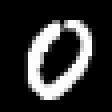

In [36]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 11
Actual Label: 9


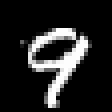

In [37]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 4
Actual Label: 2


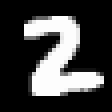

In [38]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)

Predicted Label: 9
Actual Label: 7


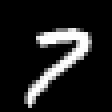

In [39]:
i = rand([x for x = 1:10000])
show_test_example(NN, i, test_data)